# IMPORING REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam

# PREPARING THE DATASET

### IMPORTING THE DATASET

In [2]:
train_ds_path = './diabetes.csv'
test_ds_path = './new_test.csv'

In [3]:
train_df = pd.read_csv(train_ds_path)
test_df = pd.read_csv(test_ds_path)

### ANALYSING THE DATASET TO SEARCH FOR MISSING VALUES

In [4]:
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [6]:
train_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
train_df.isin({0}).sum()

Pregnancies                  301
Glucose                       13
BloodPressure                 90
SkinThickness                573
Insulin                      956
BMI                           28
DiabetesPedigreeFunction       0
Age                            0
Outcome                     1316
dtype: int64

In [8]:
test_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,190,78,38,150,45.1,0.153,48
1,0,80,84,36,120,50.2,0.211,26
2,2,138,82,46,255,52.3,0.315,30
3,1,110,63,44,480,62.7,0.616,32


### FILLING MISSING VALUES WITH THE MEAN OF THE RESPECTIVE COLUMNS

In [9]:
featureList = ['Glucose', 'BloodPressure',	'SkinThickness',	'Insulin',	'BMI']

In [10]:
for col in featureList:
  train_df[col] = train_df[col].replace({ 0 : train_df[col].mean() })

C:\Users\adity\miniconda3\envs\tfgpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\adity\miniconda3\envs\tfgpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\adity\miniconda3\envs\tfgpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


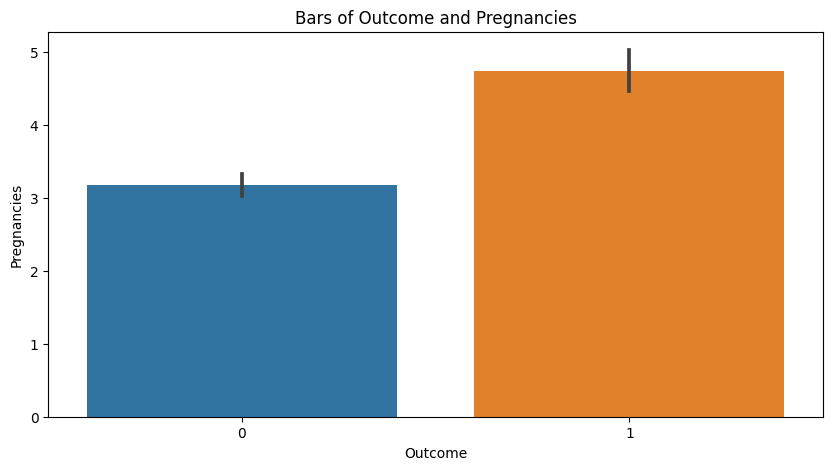

In [11]:
plt.figure(figsize=(10, 5))
sns.barplot(x = 'Outcome', y = 'Pregnancies', data=train_df,) 

plt.title("Bars of Outcome and Pregnancies")
plt.xlabel("Outcome")
plt.ylabel("Pregnancies")
plt.show()

### DEFINING DEPENDENT (OUTCOME) AND INDEPENDETN (FEATURES) VARAIBLES

In [12]:
features_cols = train_df.drop(['Pregnancies','Outcome'], axis = 1)
outcome_col = train_df['Outcome']

In [13]:
print(train_df.Outcome.value_counts())

Outcome
0    1316
1     684
Name: count, dtype: int64


In [14]:
features_cols.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,138.0,62.0000,35.000,80.254,33.6,0.127,47
1,84.0,82.0000,31.000,125.000,38.2,0.233,23
2,145.0,69.1455,20.935,80.254,44.2,0.630,31
3,135.0,68.0000,42.000,250.000,42.3,0.365,24
4,139.0,62.0000,41.000,480.000,40.7,0.536,21


In [15]:
outcome_col.head()

0    1
1    0
2    1
3    1
4    0
Name: Outcome, dtype: int64

In [16]:
features_cols.isin({0}).sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

### SPLITTING THE DATASET FOR TRAINING AND VALIDATION

In [17]:
x_train, x_test, y_train, y_test = train_test_split(features_cols, outcome_col, test_size = 0.2, random_state = 43)

In [18]:
x_train

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
815,126.0,88.0,36.000,108.000,38.5,0.349,49
1573,89.0,90.0,30.000,80.254,33.5,0.292,42
1238,106.0,70.0,37.000,148.000,39.4,0.605,22
1153,169.0,74.0,19.000,125.000,29.9,0.268,31
926,135.0,54.0,20.935,80.254,26.7,0.687,62
...,...,...,...,...,...,...,...
277,104.0,64.0,23.000,116.000,27.8,0.454,23
1841,181.0,88.0,44.000,510.000,43.3,0.222,26
255,113.0,64.0,35.000,80.254,33.6,0.543,21
1344,181.0,68.0,36.000,495.000,30.1,0.615,60


### NORMALIZING THE DATA

In [19]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
x_train

array([[0.52903226, 0.65306122, 0.2815534 , ..., 0.32532051, 0.11571307,
        0.46666667],
       [0.29032258, 0.67346939, 0.22330097, ..., 0.24519231, 0.09137489,
        0.35      ],
       [0.4       , 0.46938776, 0.29126214, ..., 0.33974359, 0.22502135,
        0.01666667],
       ...,
       [0.44516129, 0.40816327, 0.27184466, ..., 0.24679487, 0.19854825,
        0.        ],
       [0.88387097, 0.44897959, 0.2815534 , ..., 0.19070513, 0.2292912 ,
        0.65      ],
       [0.43225806, 0.48979592, 0.38834951, ..., 0.30288462, 0.56020495,
        0.58333333]])

In [21]:
print('x_train shape : ' + str(x_train.shape))
print('x_test shape : ' + str(x_test.shape))
print('y_train shape : ' + str(y_train.shape))
print('y_test shape : ' + str(y_test.shape))

x_train shape : (1600, 7)
x_test shape : (400, 7)
y_train shape : (1600,)
y_test shape : (400,)


# BUILDING AND TRAINING THE MODEL

### CREATING THE MODEL

In [33]:
model = Sequential()
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))

In [34]:
loss_fn = MeanSquaredError()
optimizer_fn = Adam(1e-4)

In [35]:
model.compile(optimizer_fn, loss_fn, metrics = ["accuracy"])

### TRAINING THE MODEL

In [36]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 200, batch_size = 16)

Epoch 1/200
100/100 [==============================] - 1s 5ms/step - loss: 0.2971 - accuracy: 0.6662 - val_loss: 0.2805 - val_accuracy: 0.6250
Epoch 2/200
100/100 [==============================] - 0s 4ms/step - loss: 0.2150 - accuracy: 0.6650 - val_loss: 0.2008 - val_accuracy: 0.6325
Epoch 3/200
100/100 [==============================] - 0s 4ms/step - loss: 0.1917 - accuracy: 0.6875 - val_loss: 0.1905 - val_accuracy: 0.6925
Epoch 4/200
100/100 [==============================] - 0s 3ms/step - loss: 0.1826 - accuracy: 0.7237 - val_loss: 0.1784 - val_accuracy: 0.7200
Epoch 5/200
100/100 [==============================] - 0s 3ms/step - loss: 0.1722 - accuracy: 0.7469 - val_loss: 0.1642 - val_accuracy: 0.7650
Epoch 6/200
100/100 [==============================] - 0s 3ms/step - loss: 0.1645 - accuracy: 0.7656 - val_loss: 0.1538 - val_accuracy: 0.8100
Epoch 7/200
100/100 [==============================] - 0s 3ms/step - loss: 0.1594 - accuracy: 0.7650 - val_loss: 0.1492 - val_accuracy: 0.8025

In [40]:
print('Training accuracy = ' + str(history.history["accuracy"][-1]))
print('Validation accuracy = ' + str(history.history["val_accuracy"][-1]))

Training accuracy = 0.9143750071525574
Validation accuracy = 0.8999999761581421


### MODEL SUMMARY

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (16, 128)                 1024      
                                                                 
 dense_19 (Dense)            (16, 64)                  8256      
                                                                 
 dense_20 (Dense)            (16, 64)                  4160      
                                                                 
 dense_21 (Dense)            (16, 32)                  2080      
                                                                 
 dense_22 (Dense)            (16, 32)                  1056      
                                                                 
 dense_23 (Dense)            (16, 16)                  528       
                                                                 
 dense_24 (Dense)            (16, 8)                  

C:\Users\adity\miniconda3\envs\tfgpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\adity\miniconda3\envs\tfgpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\adity\miniconda3\envs\tfgpu\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\adity\miniconda3\envs\tfgpu\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

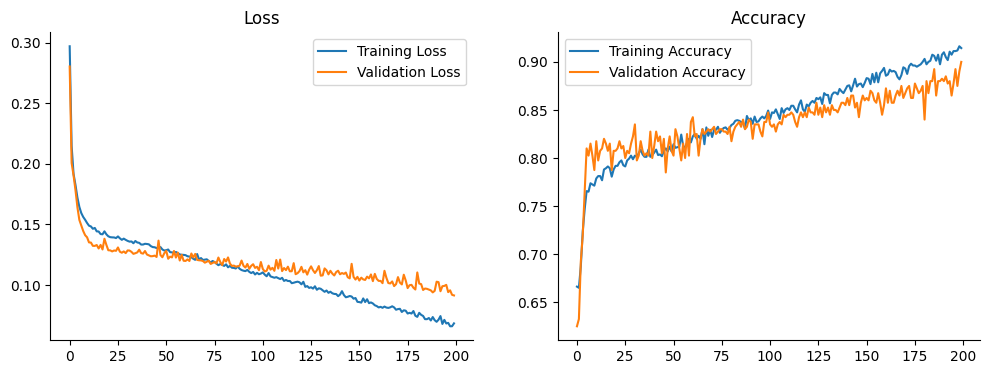

In [38]:
fig, axes = plt.subplots(1, 2, figsize = (12, 4))

sns.lineplot(x = range(len(history.history["loss"])), y = history.history["loss"], ax = axes[0], label = "Training Loss")
sns.lineplot(x = range(len(history.history["loss"])), y = history.history["val_loss"], ax = axes[0], label = "Validation Loss")

sns.lineplot(x = range(len(history.history["accuracy"])), y = history.history["accuracy"], ax = axes[1], label = "Training Accuracy")
sns.lineplot(x = range(len(history.history["accuracy"])), y = history.history["val_accuracy"], ax = axes[1], label = "Validation Accuracy")
axes[0].set_title("Loss"); axes[1].set_title("Accuracy")

sns.despine()
plt.show()

# TESTING THE MODEL

In [41]:
test_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,190,78,38,150,45.1,0.153,48
1,0,80,84,36,120,50.2,0.211,26
2,2,138,82,46,255,52.3,0.315,30
3,1,110,63,44,480,62.7,0.616,32


In [39]:
eval = scaler.fit_transform(test_df.drop(['Pregnancies'], axis = 1))
model.predict(eval)

1/1 [==============================] - 0s 92ms/step


array([[0.0717048 ],
       [0.02494415],
       [0.08483595],
       [1.3496666 ]], dtype=float32)